# Бусаров 7 вариант. Поиск подстроки в строке
#### - Алгоритм Рабина-Карпа
#### - Алгоритм Бойера-Мура

In [1]:
from wand.image import Image as WImage

# Алгоритм Рабина-Карпа

## Описание
Алгоритм достаточно просто устроен. Первоначально необходимо взять хэш от шаблона. Проходясь по тексту вычислять хэши кусков равных длине шаблона и сравнивать хэши. Если хэши оказались равны, то сравнивать слова посимвольно

## Достоинтсва и недостатки
**Достоинства:** алгоритм прост в освоении и написании, быстро находит слово в слове, незаивисимо от длины, так как вычисляется хэш
**Недостатки:** не очень быстрый на разнообразном большом тексте, меньше используется 

## Реализация

In [2]:
def rabinKarp(big_str: str, small_str: str):
    indexes = []
    n = len(big_str)
    m = len(small_str)
    hsub = hash(small_str)
    hs = hash(big_str[0:m])
    hashed_str = ''
    for i in range(0, n - m + 1):
        hs = hash(big_str[i:i + m])
        if hs == hsub:
            hashed_str = big_str[i:i+m]
            if big_str[i:i+m] == small_str:
                indexes.append(i)
        hs = hash(big_str[i:i+m])
    
    print(f'finded words: {len(indexes)}')
    return indexes


print(rabinKarp('potter potter pott', 'potter'))

finded words: 2
[0, 7]


## Псевдокод алгоритма Рабина-Карпа
    std::vector<int> rabinKarp(std::string big_str, std::string small_str) {
        std::vector<int> indexes;
        int n = big_str.length();
        int m = small_str.length();
        int hsub = std::hash<std::string>{}(small_str);
        int hs = std::hash<std::string>{}(big_str.substr(0, m));
        std::string hashed_str = "";
        for (int i = 0; i < n - m + 1; i++) {
            hs = std::hash<std::string>{}(big_str.substr(i, m));
            if (hs == hsub) {
                hashed_str = big_str.substr(i, m);
                if (big_str.substr(i, m) == small_str) {
                    indexes.push_back(i);
                }
            }
            hs = std::hash<std::string>{}(big_str.substr(i, m));
        }
        std::cout << "finded words: " << indexes.size() << std::endl;
        return indexes;
    }



## Блок-схема алгоритма Рабина-Карпа

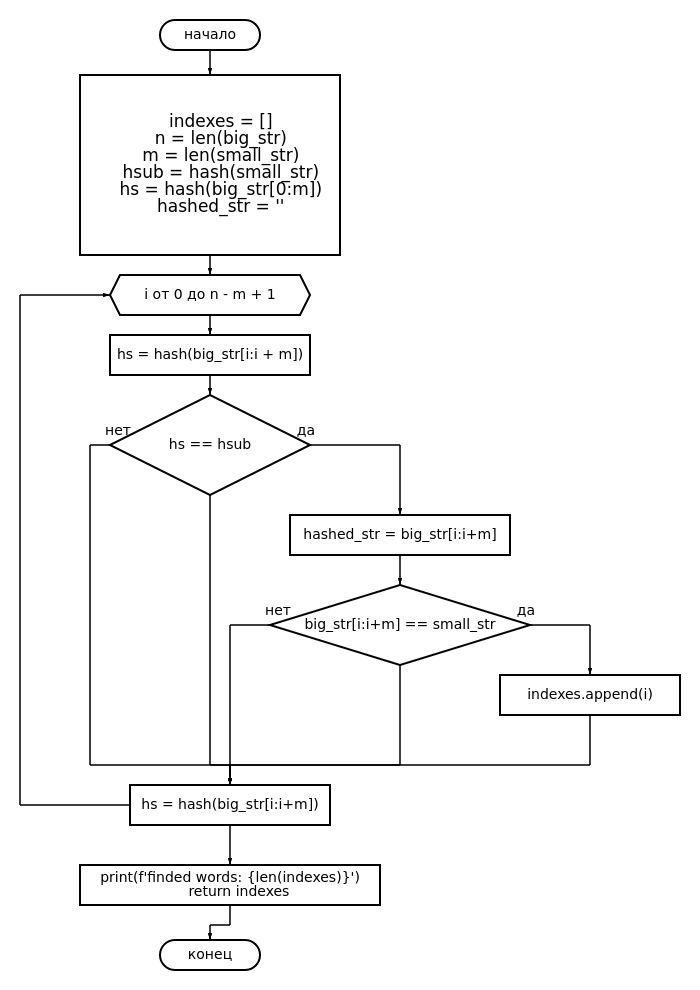

In [3]:
img = WImage(filename='./img/rabinKarp.png')
img

# Aлгоритм Бойера-Мура

## Описание
Это уникальный алгоритм, который считается наиболее быстрым среди алгоритмов общего назначения, предназначенных для поиска подстроки в строке. Алгоритм проходит по шаблону с конца и испольузет раннее составленную таблицу смещений, чтобы перемещаться по тексту.

Предварительно составляется таблица смещений шаблона. Начиная от предпоследнего символа формируется словарь с ключом буквой шаблона и значением - ее позицией с конца. Далее в процеесе прохождения по тексту, итератор смешается на указанное количество символов, согласно таблице.

Алгоритм Бойера-Мура считается наиболее эффективным алгоритмом поиска шаблонов в стандартных приложениях и командах, таких как Ctrl+F в браузерах и текстовых редакторах.

## Преимущества и недостатки
**Преимущества:** широко распространен, является наиболее быстрых среди стандартных алгоритмов поиска

**Недостатки:** требуются предварительные вычисления, но для недлинного шаблона, работает быстро

## Реализация алгоритма Бойера-Мура

In [4]:
def getTable(my_str : str):
    M = len(my_str)
    d = {}
    i = 1
    for char_i in range(M-2, -1, -1):
        if my_str[char_i] not in d:
            d[my_str[char_i]] = i
        i += 1
    if my_str[M-1] not in d:
        d[my_str[M-1]] = M
    d['***'] = M
    return d


def boyerMoore(input_str, find_str):
    indexes = []
    d = getTable(find_str)
    M = len(find_str)
    N = len(input_str)
    i_find = M - 1
    i_input = M - 1
    i_reverse_input = 0
    word_counter = 0
    while i_input < N:
        for i_reverse in range(0, M):
            if find_str[i_find - i_reverse] != input_str[i_input - i_reverse_input]:
                i_reverse_input = 0
                if i_reverse == 0:
                    i_input += d[input_str[i_input]] if d.get(input_str[i_input], False) else d['***']
                else:
                    i_input += d[find_str[i_find - i_reverse]]
                break
            i_reverse_input += 1
            if i_reverse == M - 1:
                indexes.append(i_input - M + 1)
                i_reverse_input -= 1
                word_counter += 1
                break
    print(f'finded words: {len(indexes)}')
    return indexes

## Псевдокод алгоритма Бойера-Мура
    void getTable(string my_str) {
        int M = my_str.length();
        map<char, int> d;
        int i = 1;
        for (int char_i = M - 2; char_i >= 0; char_i--) {
            if (d.find(my_str[char_i]) == d.end()) {
                d[my_str[char_i]] = i;
            }
            i++;
        }
        if (d.find(my_str[M - 1]) == d.end()) {
            d[my_str[M - 1]] = M;
        }
        d['***'] = M;
        return d;
    }

    vector<int> boyerMoore(string input_str, string find_str) {
        vector<int> indexes;
        map<char, int> d = getTable(find_str);
        int M = find_str.length();
        int N = input_str.length();
        int i_find = M - 1;
        int i_input = M - 1;
        int i_reverse_input = 0;
        int word_counter = 0;
        while (i_input < N) {
            for (int i_reverse = 0; i_reverse < M; i_reverse++) {
                if (find_str[i_find - i_reverse] != input_str[i_input - i_reverse_input]) {
                    i_reverse_input = 0;
                    if (i_reverse == 0) {
                        if (d.find(input_str[i_input]) != d.end()) {
                            i_input += d[input_str[i_input]];
                        }
                        else {
                            i_input += d['***'];
                        }
                    }
                    else {
                        i_input += d[find_str[i_find - i_reverse]];
                    }
                    break;
                }
                i_reverse_input++;
                if (i_reverse == M - 1) {
                    indexes.push_back(i_input - M + 1);



## Блок-схема алгоритма Бойера-Мура

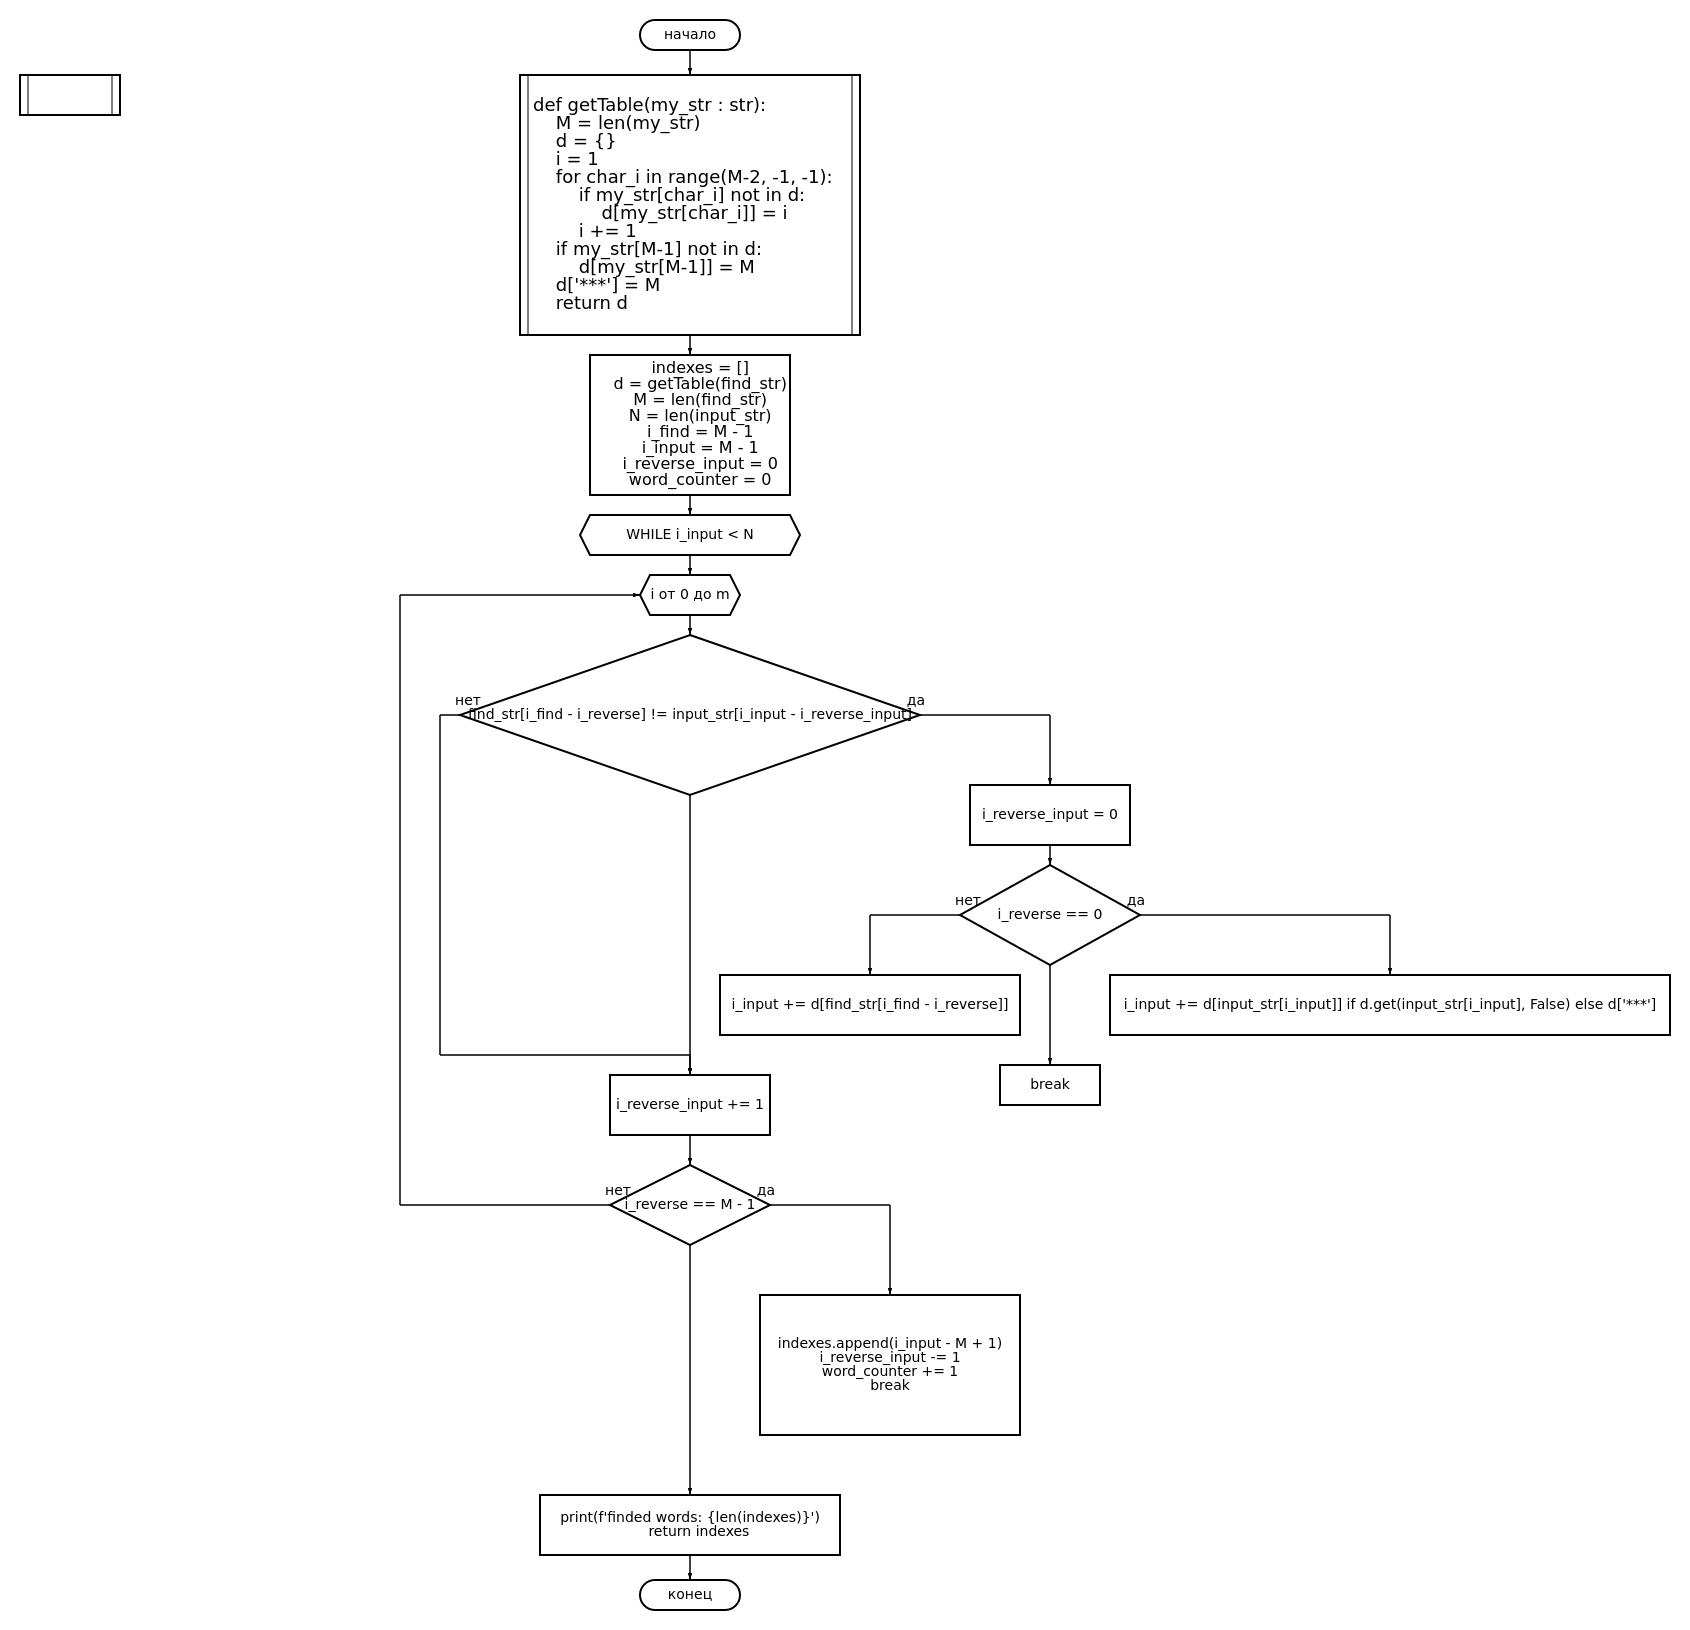

In [5]:
img = WImage(filename='./img/boyerMoore.png')
img

# Тесты

In [6]:
with open('STONE.txt', 'r') as file:
    my_book = file.read()

In [7]:
%%time
print(rabinKarp(my_book, 'Potter'))

finded words: 113
[6, 989, 1003, 1301, 1359, 1472, 5235, 5740, 5821, 9286, 10054, 10766, 11074, 11165, 17660, 17702, 18094, 18247, 19686, 20153, 25390, 25952, 26943, 45075, 49823, 55920, 61776, 61913, 73870, 74144, 76657, 77156, 77198, 84459, 84889, 97667, 97810, 98153, 98217, 98323, 98899, 99217, 103753, 117729, 119440, 119849, 120404, 122029, 122476, 134876, 137266, 139491, 149984, 153298, 154027, 154369, 170839, 170957, 170990, 172114, 172129, 193629, 194902, 195320, 195697, 195992, 196366, 196859, 198110, 210283, 212545, 214445, 214742, 215180, 215847, 217414, 233481, 234059, 234262, 236514, 257626, 261533, 263015, 297623, 315455, 316385, 316960, 317860, 341708, 345508, 346072, 346955, 346980, 347523, 359566, 365874, 366498, 368082, 369086, 370094, 380353, 380496, 381182, 382248, 408820, 410170, 410753, 414085, 415399, 416192, 434532, 438319, 438607]
CPU times: user 94.7 ms, sys: 3.81 ms, total: 98.5 ms
Wall time: 105 ms


In [8]:
%%time
print(boyerMoore(my_book, 'Potter'))

finded words: 113
[6, 989, 1003, 1301, 1359, 1472, 5235, 5740, 5821, 9286, 10054, 10766, 11074, 11165, 17660, 17702, 18094, 18247, 19686, 20153, 25390, 25952, 26943, 45075, 49823, 55920, 61776, 61913, 73870, 74144, 76657, 77156, 77198, 84459, 84889, 97667, 97810, 98153, 98217, 98323, 98899, 99217, 103753, 117729, 119440, 119849, 120404, 122029, 122476, 134876, 137266, 139491, 149984, 153298, 154027, 154369, 170839, 170957, 170990, 172114, 172129, 193629, 194902, 195320, 195697, 195992, 196366, 196859, 198110, 210283, 212545, 214445, 214742, 215180, 215847, 217414, 233481, 234059, 234262, 236514, 257626, 261533, 263015, 297623, 315455, 316385, 316960, 317860, 341708, 345508, 346072, 346955, 346980, 347523, 359566, 365874, 366498, 368082, 369086, 370094, 380353, 380496, 381182, 382248, 408820, 410170, 410753, 414085, 415399, 416192, 434532, 438319, 438607]
CPU times: user 23.7 ms, sys: 415 µs, total: 24.1 ms
Wall time: 30.9 ms


In [9]:
assert boyerMoore(my_book, 'Potter') == rabinKarp(my_book, 'Potter')

finded words: 113
finded words: 113


На книге Гарри Поттера по проведенным тестам времени алгоритм **Бойера-Мура** оказывается быстрее в среднем в **3** раза

In [10]:
my_str = 'b '
find_str = ''
for i in range(1000000):
    my_str += 'a'
    find_str += 'a'

In [11]:
%%time
boyerMoore(my_str, find_str)

finded words: 1
CPU times: user 339 ms, sys: 8.98 ms, total: 348 ms
Wall time: 449 ms


[2]

In [12]:
%%time
rabinKarp(my_str, find_str)

finded words: 1
CPU times: user 4.22 ms, sys: 11 µs, total: 4.24 ms
Wall time: 5.02 ms


[2]

При поиске слова **'aaaa...a'** в строке **'baaaa...a'** алгоритм **Рабина-Карпа** оказывается быстрее в среднем в **100** раз

In [13]:
%%time
rabinKarp(my_book, my_book)

finded words: 1
CPU times: user 242 µs, sys: 20 µs, total: 262 µs
Wall time: 254 µs


[0]

In [14]:
%%time
boyerMoore(my_book, my_book)

finded words: 1
CPU times: user 66.5 ms, sys: 81 µs, total: 66.6 ms
Wall time: 89 ms


[0]

При поиске книги в книге Гарри Поттера алгоритм **Рабина-Карпа** оказывается быстрее в среднем в **300** раз